In [1]:
import numpy 
import pandas as pd
from ydata_profiling import ProfileReport
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

sns.set(rc={'figure.figsize':(14, 8)})

In [2]:
df = pd.read_excel("Event report.xlsx")
df['Time'] = pd.to_datetime(df["Time"], dayfirst=True)
df = df.sort_values("Time")
df

,Time,Traffic Type,Country,Device Type,Device OS,Offer Id,PreLand Id,Campaign Id,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
54769,2023-08-01,bo,BA,Mobile,Android,97,0,21,0,0,4,0,0.0,0.0,0.0
52824,2023-08-01,bl,UA,Mobile,Linux,122,0,22,0,0,1,0,0.0,0.0,0.0
21078,2023-08-01,direct,BY,Desktop,Windows,25,0,18,0,0,1,0,0.0,0.0,0.0
21042,2023-08-01,direct,BR,Mobile,Linux,115,5,27,0,0,6,0,0.0,0.0,0.0
21023,2023-08-01,bo,AT,Mobile,Android,25,0,20,0,0,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50507,2023-08-15,non-target,SA,Tablet,Android,60,0,20,0,0,1,0,0.0,0.0,0.0
66882,2023-08-15,direct,AT,Mobile,iOS,0,3,25,0,6,0,0,0.0,0.0,0.0
35213,2023-08-15,direct,CO,Mobile,Android,51,0,12,0,0,9,0,0.0,0.0,0.0
44104,2023-08-15,direct,IT,Mobile,iOS,0,4,26,0,10,0,0,0.0,0.0,0.0


In [3]:
value_counts = df['Time'].value_counts().sort_index()
print(value_counts)

2023-08-01    3375
2023-08-02    4711
2023-08-03    5685
2023-08-04    5727
2023-08-05    5272
2023-08-06    5305
2023-08-07    5343
2023-08-08    4798
2023-08-09    4817
2023-08-10    4802
2023-08-11    4503
2023-08-12    4457
2023-08-13    4486
2023-08-14    4576
2023-08-15    4340
Name: Time, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Time'>

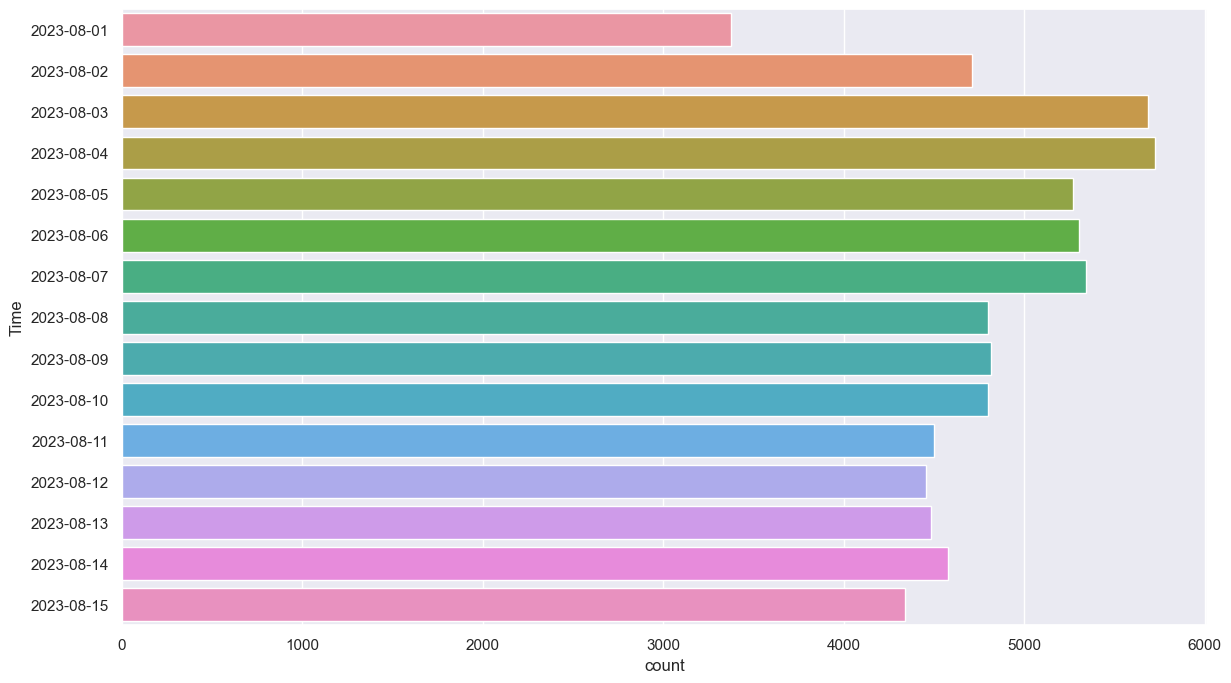

In [12]:
sns.countplot(y=df['Time'].dt.date)

In [16]:
df[df['Campaign Id'] == 26]['Device Type'].value_counts()

Mobile            3898
Desktop           1450
Tablet             694
custom-unknown      46
Name: Device Type, dtype: int64

In [174]:
df['Campaign Id'].value_counts().sort_index()

9        84
10     2270
11     1115
12     3174
13     3352
14      669
15     3827
16      804
17     3345
18     1265
19       41
20    10922
21    13656
22     3567
24     4444
25     1778
26     6088
27     5622
28     1039
29     2894
31     1862
34      379
Name: Campaign Id, dtype: int64

<AxesSubplot:xlabel='Campaign Id', ylabel='count'>

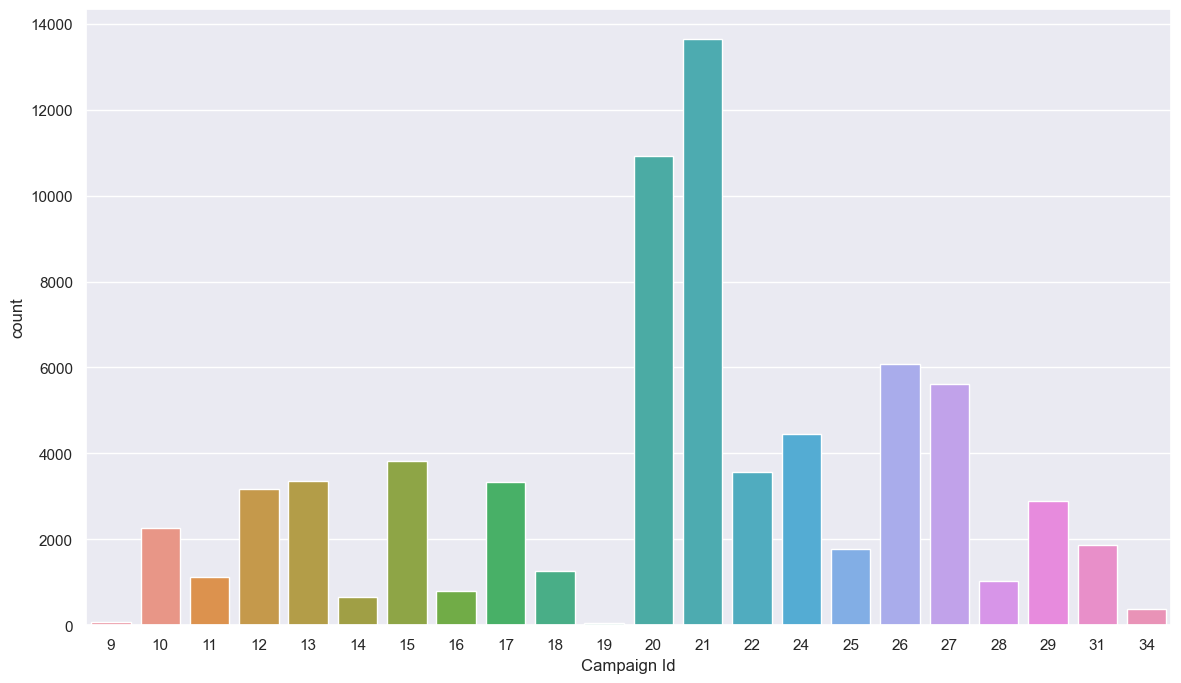

In [232]:
sns.countplot(df['Campaign Id'])

<AxesSubplot:xlabel='Campaign Id', ylabel='Profit'>

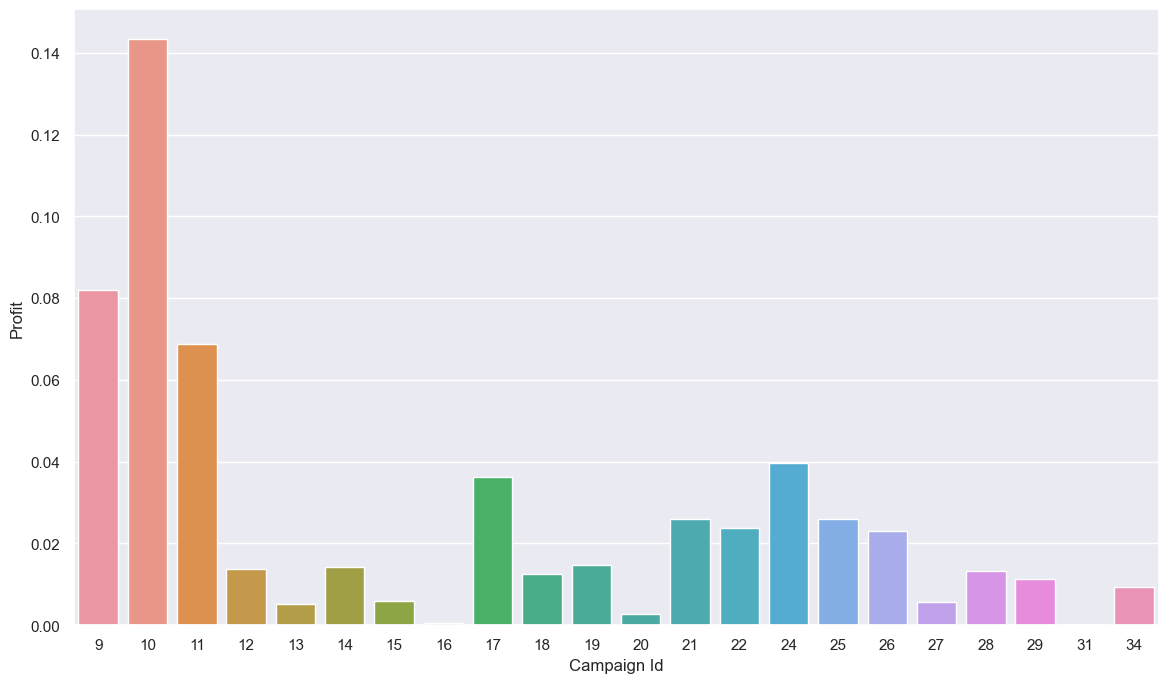

In [234]:
sns.barplot(data=df, x='Campaign Id', y='Profit', ci=0)

In [17]:
Country_column = df['Country']
Country_counts = Country_column.value_counts()

print("Кількість кожного унікального значення в колонці 'Country':")
print(Country_counts)

Кількість кожного унікального значення в колонці 'Country':
US    4037
DE    2611
UK    1970
IT    1923
FR    1820
      ... 
NR       6
IO       5
MF       4
PM       2
ER       2
Name: Country, Length: 229, dtype: int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72197 entries, 54769 to 18603
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             72197 non-null  object 
 1   Traffic Type     72197 non-null  object 
 2   Country          72127 non-null  object 
 3   Device Type      72197 non-null  object 
 4   Device OS        72197 non-null  object 
 5   Offer Id         72197 non-null  int64  
 6   PreLand Id       72197 non-null  int64  
 7   Campaign Id      72197 non-null  int64  
 8   Campaing Visits  72197 non-null  int64  
 9   PreLandVisits    72197 non-null  int64  
 10  OfferClicks      72197 non-null  int64  
 11  Conversions      72197 non-null  int64  
 12  Payout           72197 non-null  float64
 13  Revenue          72197 non-null  float64
 14  Profit           72197 non-null  float64
dtypes: float64(3), int64(7), object(5)
memory usage: 8.8+ MB


In [38]:
data_10 = df[df['Campaign Id'] == 10]
data_10

,Time,Traffic Type,Country,Device Type,Device OS,Offer Id,PreLand Id,Campaign Id,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
15,2023-08-05,direct,UK,Tablet,iOS,0,0,10,10,0,0,0,0.00,0.0,0.00
27,2023-08-01,direct,UK,Tablet,Android,0,0,10,10,0,0,0,0.00,0.0,0.00
87,2023-08-01,direct,US,Mobile,iOS,47,0,10,0,0,45,1,2.75,3.5,0.75
96,2023-08-11,direct,AU,Mobile,Android,51,0,10,0,0,4,0,0.00,0.0,0.00
223,2023-08-10,direct,US,custom-unknown,custom-unknown,25,0,10,0,0,4,0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72111,2023-08-09,direct,AU,Mobile,Android,79,0,10,0,0,1,0,0.00,0.0,0.00
72130,2023-08-12,direct,UK,Desktop,custom-unknown,31,0,10,0,0,1,0,0.00,0.0,0.00
72168,2023-08-11,direct,CA,Tablet,iOS,0,0,10,14,0,0,0,0.00,0.0,0.00
72179,2023-08-15,direct,CA,Tablet,Android,0,0,10,14,0,0,0,0.00,0.0,0.00


In [182]:
def calculate_ctr(df, campaign_id):

    campaign_data = df[df['Campaign Id'] == campaign_id]
    

    clicks = campaign_data['OfferClicks'].sum()
    visits = campaign_data['Campaing Visits'].sum()
    

    if visits != 0:
        ctr = (clicks / visits) * 100
    else:
        ctr = 0
    
    return ctr

campaign_ids = range(9, 35)

ctr_dict = {}


for campaign_id in campaign_ids:
    ctr = calculate_ctr(df, campaign_id)
    ctr_dict[campaign_id] = ctr

for campaign_id, ctr in ctr_dict.items():
    print(f'CTR для кампанії з Campaign ID {campaign_id}: {ctr:.2f}%')




CTR для кампанії з Campaign ID 9: 98.66%
CTR для кампанії з Campaign ID 10: 94.57%
CTR для кампанії з Campaign ID 11: 95.47%
CTR для кампанії з Campaign ID 12: 97.09%
CTR для кампанії з Campaign ID 13: 91.27%
CTR для кампанії з Campaign ID 14: 96.63%
CTR для кампанії з Campaign ID 15: 94.93%
CTR для кампанії з Campaign ID 16: 94.84%
CTR для кампанії з Campaign ID 17: 96.53%
CTR для кампанії з Campaign ID 18: 97.86%
CTR для кампанії з Campaign ID 19: 86.80%
CTR для кампанії з Campaign ID 20: 95.92%
CTR для кампанії з Campaign ID 21: 88.95%
CTR для кампанії з Campaign ID 22: 93.37%
CTR для кампанії з Campaign ID 23: 0.00%
CTR для кампанії з Campaign ID 24: 22.48%
CTR для кампанії з Campaign ID 25: 25.18%
CTR для кампанії з Campaign ID 26: 31.06%
CTR для кампанії з Campaign ID 27: 59.47%
CTR для кампанії з Campaign ID 28: 26.73%
CTR для кампанії з Campaign ID 29: 33.11%
CTR для кампанії з Campaign ID 30: 0.00%
CTR для кампанії з Campaign ID 31: 45.79%
CTR для кампанії з Campaign ID 32: 0.

In [185]:
def calculate_cr(df, campaign_id):
    # Фільтруємо дані для заданої кампанії
    campaign_data = df[df['Campaign Id'] == campaign_id]
    
    # Обчислюємо кількість кліків і кількість відвідувань для цієї кампанії
    conv = campaign_data['Conversions'].sum()
    clicks = campaign_data['OfferClicks'].sum()
    
    # Обчислюємо CTR
    if visits != 0:
        cr = (conv / clicks) * 100
    else:
        cr = 0
    
    return cr

# Список campaign_id від 9 до 34
campaign_ids = range(9, 35)

# Створюємо словник для збереження CTR для кожної кампанії
cr_dict = {}

# Обчислюємо CTR для кожної кампанії і зберігаємо в словнику
for campaign_id in campaign_ids:
    cr = calculate_cr(df, campaign_id)
    cr_dict[campaign_id] = cr

# Виводимо результати
for campaign_id, cr in cr_dict.items():
    print(f'CR для кампанії з Campaign ID {campaign_id}: {cr:.2f}%')

CR для кампанії з Campaign ID 9: 1.02%
CR для кампанії з Campaign ID 10: 0.99%
CR для кампанії з Campaign ID 11: 1.07%
CR для кампанії з Campaign ID 12: 1.92%
CR для кампанії з Campaign ID 13: 1.95%
CR для кампанії з Campaign ID 14: 0.87%
CR для кампанії з Campaign ID 15: 0.81%
CR для кампанії з Campaign ID 16: 0.23%
CR для кампанії з Campaign ID 17: 1.21%
CR для кампанії з Campaign ID 18: 0.69%
CR для кампанії з Campaign ID 19: 0.37%
CR для кампанії з Campaign ID 20: 0.30%
CR для кампанії з Campaign ID 21: 0.53%
CR для кампанії з Campaign ID 22: 0.66%
CR для кампанії з Campaign ID 23: nan%
CR для кампанії з Campaign ID 24: 3.21%
CR для кампанії з Campaign ID 25: 3.66%
CR для кампанії з Campaign ID 26: 3.77%
CR для кампанії з Campaign ID 27: 2.47%
CR для кампанії з Campaign ID 28: 3.37%
CR для кампанії з Campaign ID 29: 3.21%
CR для кампанії з Campaign ID 30: nan%
CR для кампанії з Campaign ID 31: 0.25%
CR для кампанії з Campaign ID 32: nan%
CR для кампанії з Campaign ID 33: nan%
CR дл

C:\Users\Ann\AppData\Local\Temp\ipykernel_18920\1741014396.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  cr = (conv / clicks) * 100


In [191]:
def calculate_roi(df, campaign_id):
    # Фільтруємо дані для заданої кампанії
    campaign_data = df[df['Campaign Id'] == campaign_id]
    
    # Обчислюємо загальний прибуток та витрати для цієї кампанії
    total_revenue = campaign_data['Revenue '].sum()
    total_payout = campaign_data['Payout '].sum()
    
    # Обчислюємо ROI
    if total_payout != 0:
        roi = ((total_revenue - total_payout) / total_payout) * 100
    else:
        roi = 0
    
    return roi

# Список campaign_id від 9 до 34
campaign_ids = range(9, 35)

# Створюємо словник для збереження ROI для кожної кампанії
roi_dict = {}

# Обчислюємо ROI для кожної кампанії і зберігаємо в словнику
for campaign_id in campaign_ids:
    roi = calculate_roi(df, campaign_id)
    roi_dict[campaign_id] = roi

# Виводимо результати
for campaign_id, roi in roi_dict.items():
    print(f'ROI для кампанії з Campaign ID {campaign_id}: {roi:.2f}%')


ROI для кампанії з Campaign ID 9: 0.00%
ROI для кампанії з Campaign ID 10: 27.42%
ROI для кампанії з Campaign ID 11: 27.50%
ROI для кампанії з Campaign ID 12: 27.28%
ROI для кампанії з Campaign ID 13: 34.19%
ROI для кампанії з Campaign ID 14: 26.02%
ROI для кампанії з Campaign ID 15: 25.43%
ROI для кампанії з Campaign ID 16: 25.00%
ROI для кампанії з Campaign ID 17: 31.98%
ROI для кампанії з Campaign ID 18: 31.96%
ROI для кампанії з Campaign ID 19: 0.00%
ROI для кампанії з Campaign ID 20: 25.00%
ROI для кампанії з Campaign ID 21: 0.00%
ROI для кампанії з Campaign ID 22: 0.00%
ROI для кампанії з Campaign ID 23: 0.00%
ROI для кампанії з Campaign ID 24: 29.64%
ROI для кампанії з Campaign ID 25: 26.86%
ROI для кампанії з Campaign ID 26: 34.74%
ROI для кампанії з Campaign ID 27: 29.76%
ROI для кампанії з Campaign ID 28: 26.14%
ROI для кампанії з Campaign ID 29: 29.36%
ROI для кампанії з Campaign ID 30: 0.00%
ROI для кампанії з Campaign ID 31: 25.00%
ROI для кампанії з Campaign ID 32: 0.00%


In [162]:
data_16_10 = df[(df['Campaign Id'] == 16) | (df['Campaign Id'] == 10)]
data_16_10

,Time,Traffic Type,Country,Device Type,Device OS,Offer Id,PreLand Id,Campaign Id,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
53001,2023-08-01,direct,US,Desktop,Linux,0,0,10,9,0,0,0,0.0,0.00,0.000
68233,2023-08-01,direct,IE,Desktop,Windows,18,0,10,0,0,2,0,0.0,0.00,0.000
4150,2023-08-01,direct,US,Desktop,Windows,65,0,10,0,0,25,1,3.4,4.25,0.850
4192,2023-08-01,direct,SA,Mobile,iOS,0,0,16,2,0,0,0,0.0,0.00,0.000
53277,2023-08-01,direct,CA,Mobile,Android,51,0,10,0,0,1,1,2.8,3.50,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47194,2023-08-15,direct,BH,Desktop,Windows,0,0,16,2,0,0,0,0.0,0.00,0.000
54948,2023-08-15,direct,IE,Desktop,custom-unknown,0,0,10,1,0,0,0,0.0,0.00,0.000
25062,2023-08-15,direct,CA,Tablet,iOS,120,0,10,0,0,3,0,0.0,0.00,0.000
27256,2023-08-15,direct,UK,Mobile,Android,19,0,10,0,0,31,1,1.6,2.00,0.399


Порівняємо 2 компанії відносно Profit, Conversions

<AxesSubplot:xlabel='Profit', ylabel='Time'>

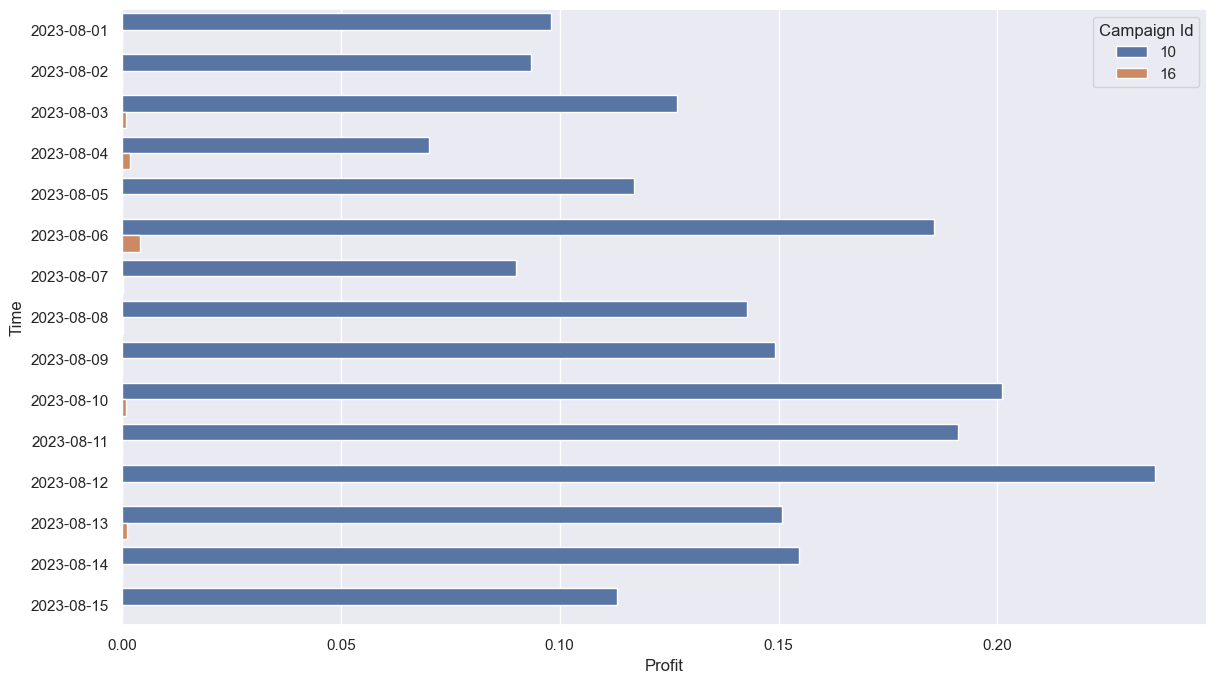

In [95]:
sns.barplot(x=data_16_10['Profit'], y=data_16_10['Time'].dt.date, hue=data_16_10['Campaign Id'], ci=None)

<AxesSubplot:xlabel='Conversions', ylabel='Time'>

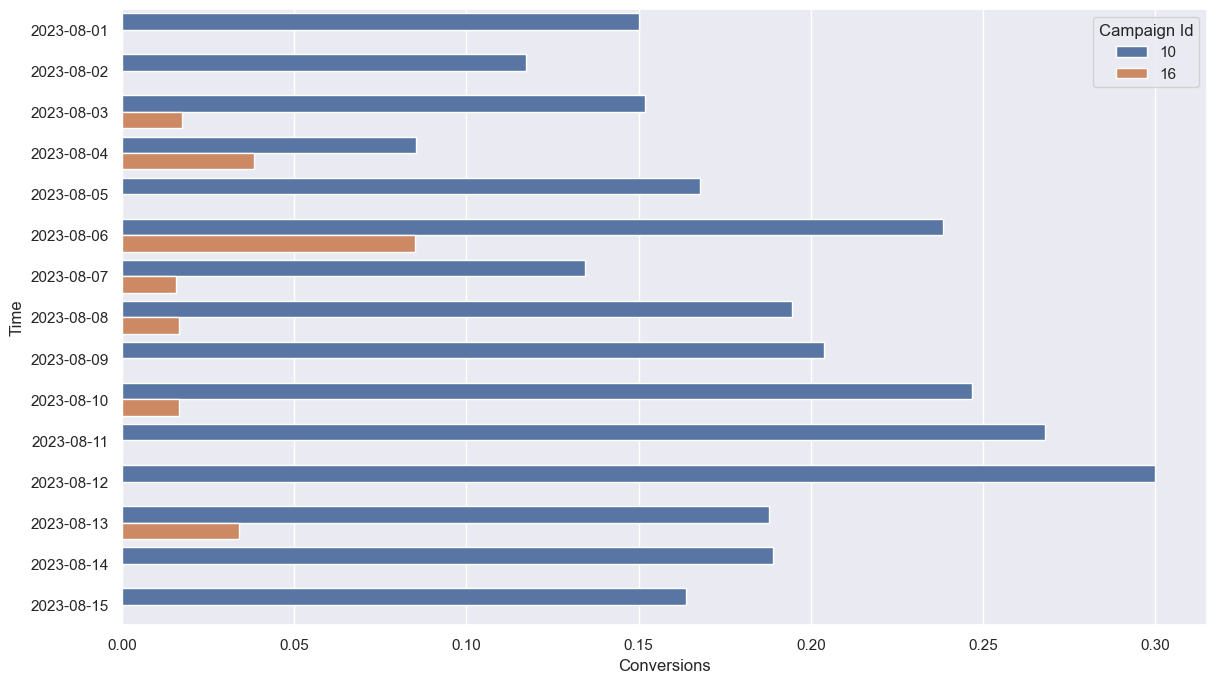

In [163]:
sns.barplot(x=data_16_10['Conversions'], y=data_16_10['Time'].dt.date, hue=data_16_10['Campaign Id'], ci=None)

<AxesSubplot:xlabel='OfferClicks', ylabel='Time'>

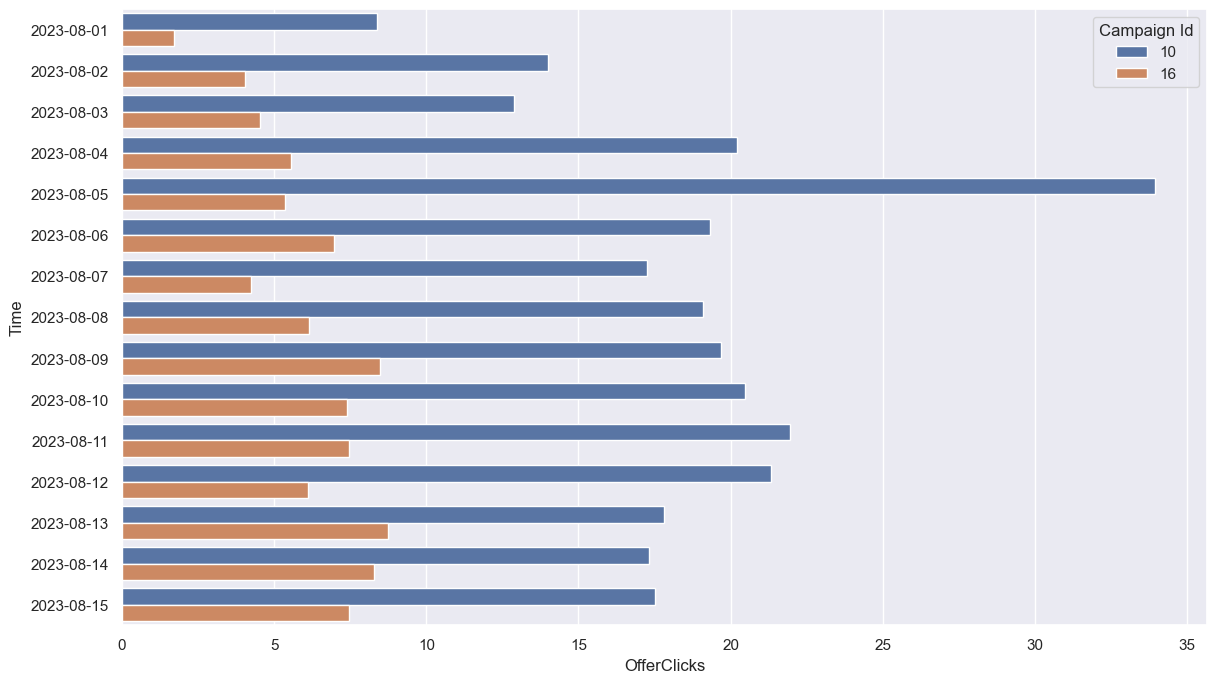

In [164]:
sns.barplot(x=data_16_10['OfferClicks'], y=data_16_10['Time'].dt.date, hue=data_16_10['Campaign Id'], ci=None)

Порівняємо показники двох компаній


In [156]:
# 16
data_08_06 = data_16_10[(data_16_10['Time'] == '2023-08-06') & (data_16_10['Campaign Id'] == 16)]
columns = ['Traffic Type',
        'Device Type',
        'Device OS',
        'Offer Id',
        'PreLand Id',
        'Campaign Id',
        'Campaing Visits',
        'PreLandVisits',
        'OfferClicks',
        'Conversions',
        'Payout ',
        'Revenue ',
        'Profit']

columns_to_hist = ['OfferClicks', 'Conversions', 'Payout ', 'Revenue ', 'Profit']
columns_to_count = ['Traffic Type', 'Device Type', 'Device OS', 'Offer Id', 'PreLand Id', 'Campaign Id', 'Campaing Visits', 'PreLandVisits']


In [141]:
data_08_06['Time'].value_counts()

2023-08-06    47
Name: Time, dtype: int64

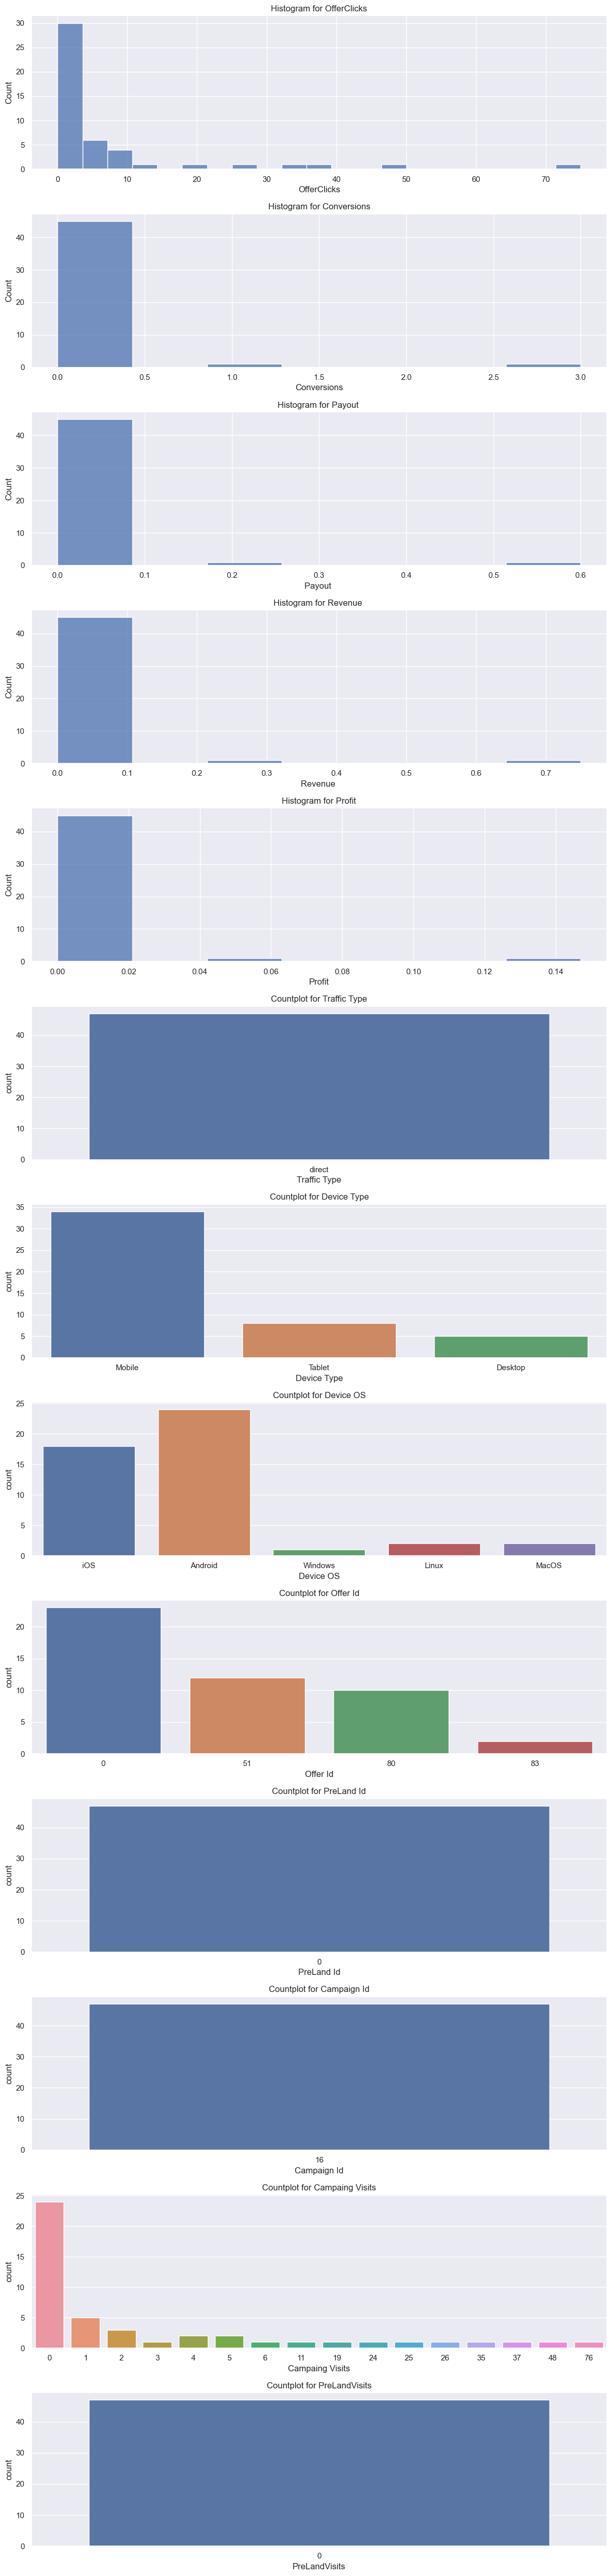

In [157]:
fig, axs = plt.subplots(len(columns_to_hist) + len(columns_to_count), 1, figsize=(12, 50))

for index, col in enumerate(columns_to_hist):
    sns.histplot(data=data_08_06, x=col, ax=axs[index])
    axs[index].set_title(f'Histogram for {col}')

for index, col in enumerate(columns_to_count, start=len(columns_to_hist)):
    sns.countplot(data=data_08_06, x=col, ax=axs[index])
    axs[index].set_title(f'Countplot for {col}')

plt.tight_layout()
plt.show()

In [158]:
#10
data_08_06 = data_16_10[(data_16_10['Time'] == '2023-08-06') & (data_16_10['Campaign Id'] == 10)]
columns = ['Traffic Type',
        'Device Type',
        'Device OS',
        'Offer Id',
        'PreLand Id',
        'Campaign Id',
        'Campaing Visits',
        'PreLandVisits',
        'OfferClicks',
        'Conversions',
        'Payout ',
        'Revenue ',
        'Profit']

columns_to_hist = ['OfferClicks', 'Conversions', 'Payout ', 'Revenue ', 'Profit']
columns_to_count = ['Traffic Type', 'Device Type', 'Device OS', 'Offer Id', 'PreLand Id', 'Campaign Id', 'Campaing Visits', 'PreLandVisits']

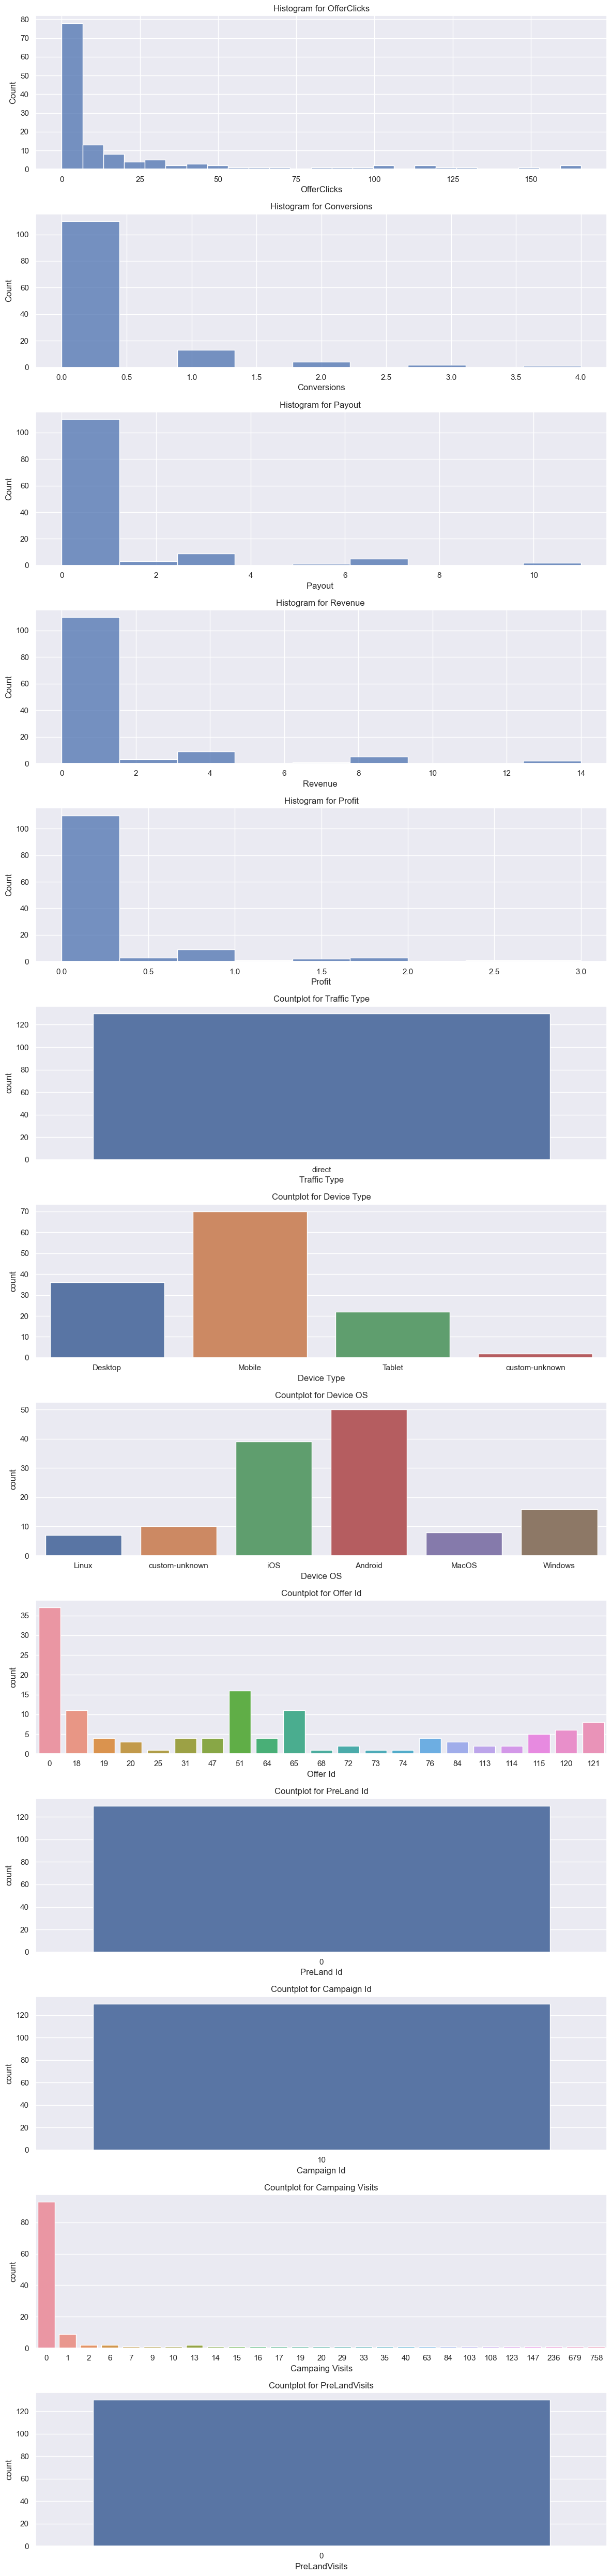

In [159]:
fig, axs = plt.subplots(len(columns_to_hist) + len(columns_to_count), 1, figsize=(12, 50))

for index, col in enumerate(columns_to_hist):
    sns.histplot(data=data_08_06, x=col, ax=axs[index])
    axs[index].set_title(f'Histogram for {col}')

for index, col in enumerate(columns_to_count, start=len(columns_to_hist)):
    sns.countplot(data=data_08_06, x=col, ax=axs[index])
    axs[index].set_title(f'Countplot for {col}')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Campaign Id', ylabel='Profit'>

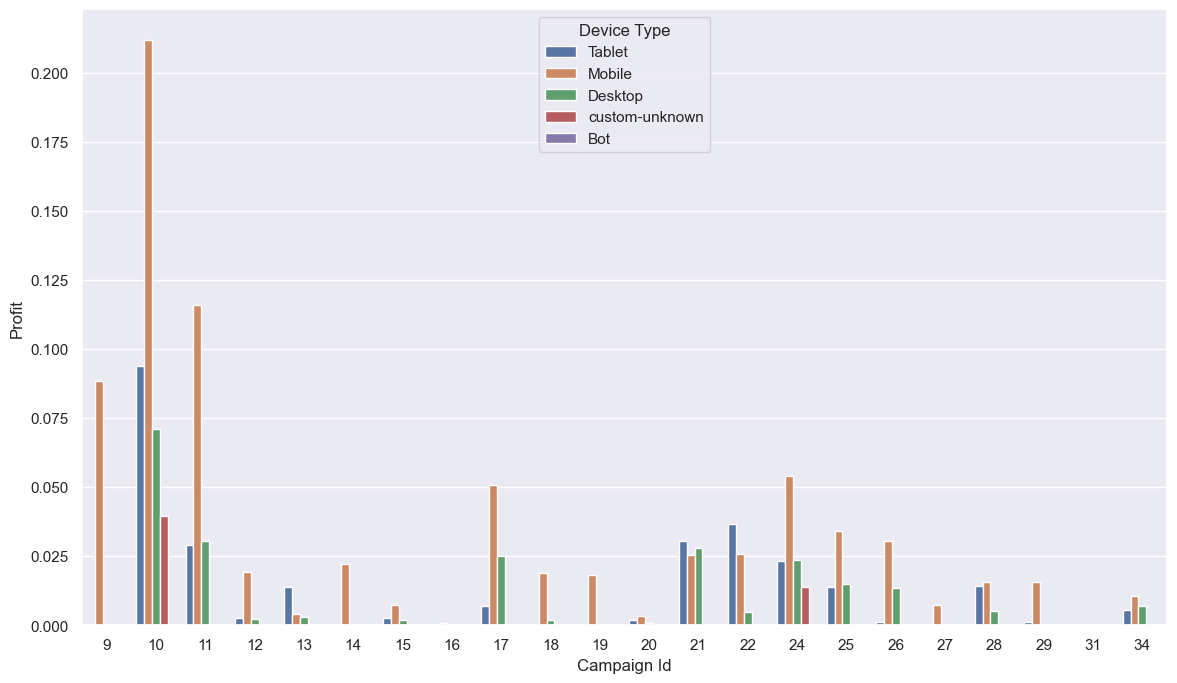

In [37]:
sns.barplot(data=df, x='Campaign Id', y='Profit', hue='Device Type', ci=0)

<AxesSubplot:xlabel='Campaign Id', ylabel='Profit'>

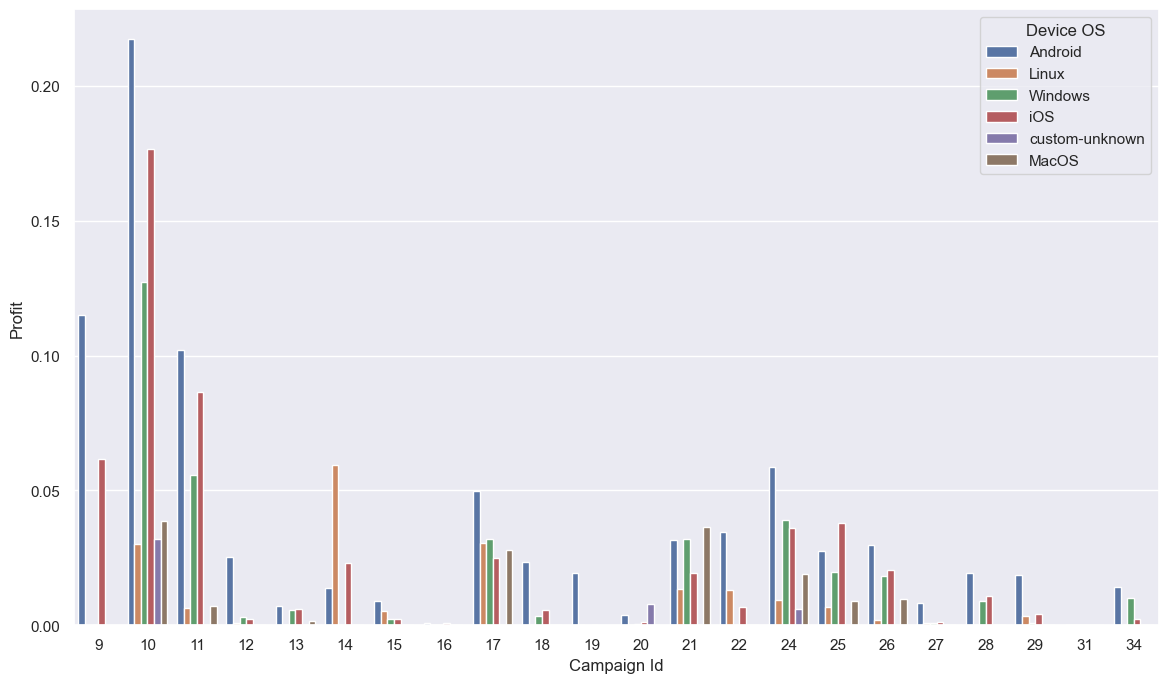

In [160]:
sns.barplot(data=df, x='Campaign Id', y='Profit', hue='Device OS', ci=0)

<AxesSubplot:xlabel='Campaign Id', ylabel='Profit'>

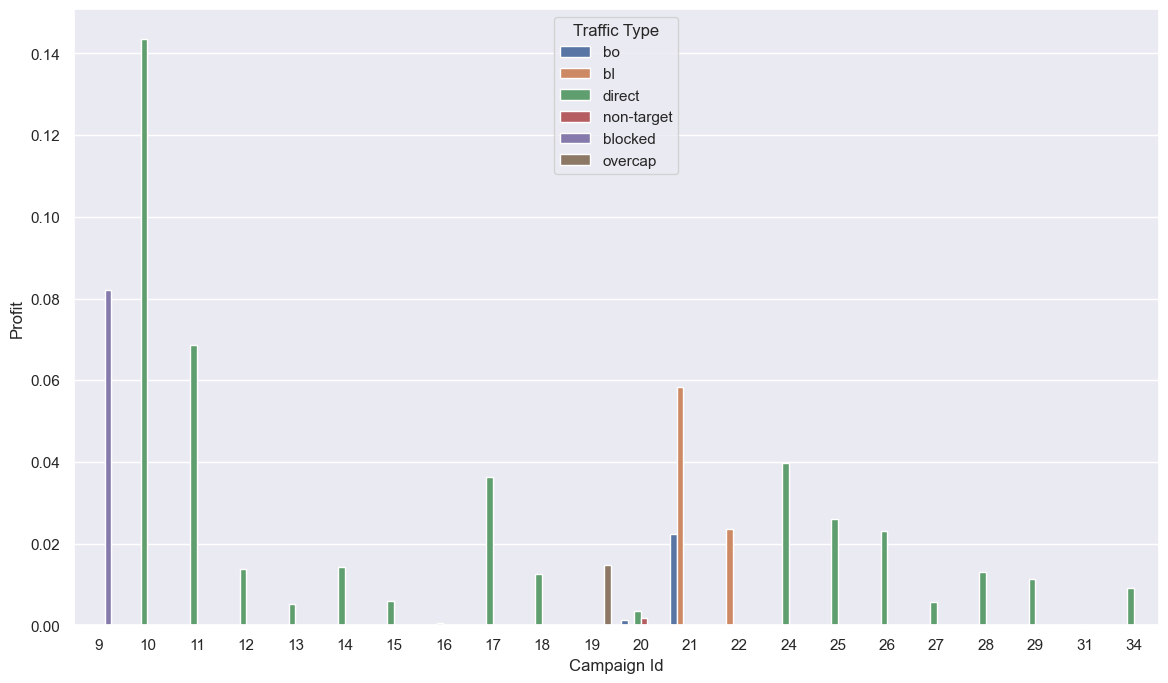

In [32]:
sns.barplot(data=df, x='Campaign Id', y='Profit', hue='Traffic Type', ci=0)

In [21]:
grouped_data = df.groupby('Campaign Id').agg({
    'Campaing Visits': 'sum',
    'PreLandVisits': 'sum',
    'OfferClicks': 'sum',
    'Conversions': 'sum',
    'Payout ': 'sum',
    'Revenue ': 'sum',
    'Profit': 'sum'
}).reset_index()

grouped_data

,Campaign Id,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
0,9,299,0,295,3,0.000,6.892,6.892
1,10,45508,0,43036,428,1188.220,1514.029,325.732
2,11,10383,0,9913,106,278.832,355.524,76.648
3,12,24346,42,23637,455,160.317,204.059,43.572
4,13,45622,0,41639,812,50.883,68.280,17.371
5,14,1188,0,1148,10,36.682,46.227,9.540
6,15,24784,0,23528,190,88.195,110.627,22.304
7,16,5411,0,5132,12,1.964,2.455,0.482
8,17,18118,0,17490,212,379.170,500.443,121.222
9,18,9900,0,9688,67,50.036,66.029,15.949


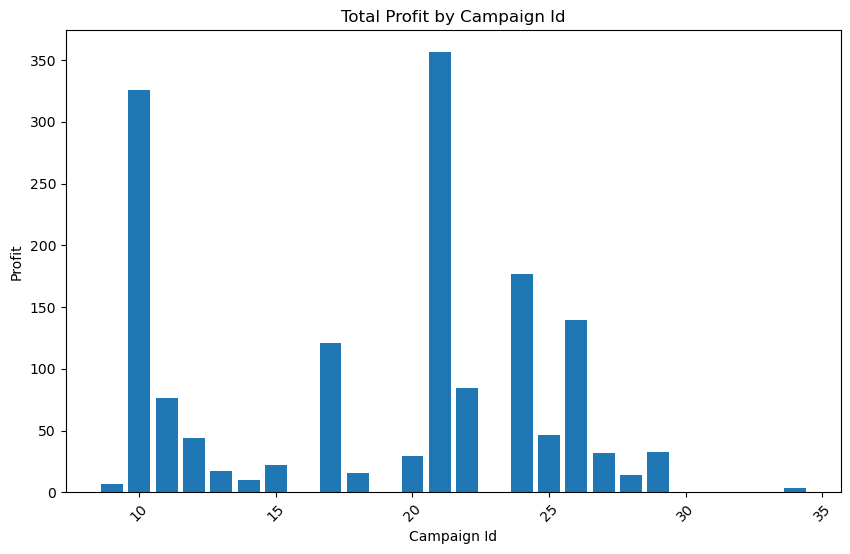

In [28]:
metric_to_visualize = 'Profit'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Campaign Id'], grouped_data[metric_to_visualize])
plt.xlabel('Campaign Id')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Campaign Id')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

Campaign Id(max)= 10, 21
Campaign Id(min)=   

In [27]:
grouped_data_traffic = df.groupby('Traffic Type').agg({
    'Campaing Visits': 'sum',
    'PreLandVisits': 'sum',
    'OfferClicks': 'sum',
    'Conversions': 'sum',
    'Payout ': 'sum',
    'Revenue ': 'sum',
    'Profit': 'sum'
}).reset_index()

grouped_data


,Traffic Type,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
0,bl,17788,1,14586,97,0.000,165.137,165.137
1,blocked,299,0,295,3,0.000,6.892,6.892
2,bo,54739,1,50655,246,12.003,290.655,278.651
3,direct,299119,90936,227896,3314,3777.678,4877.747,1099.097
4,non-target,6060,0,5737,10,17.359,21.699,4.336
5,overcap,629,0,546,2,0.000,0.600,0.600


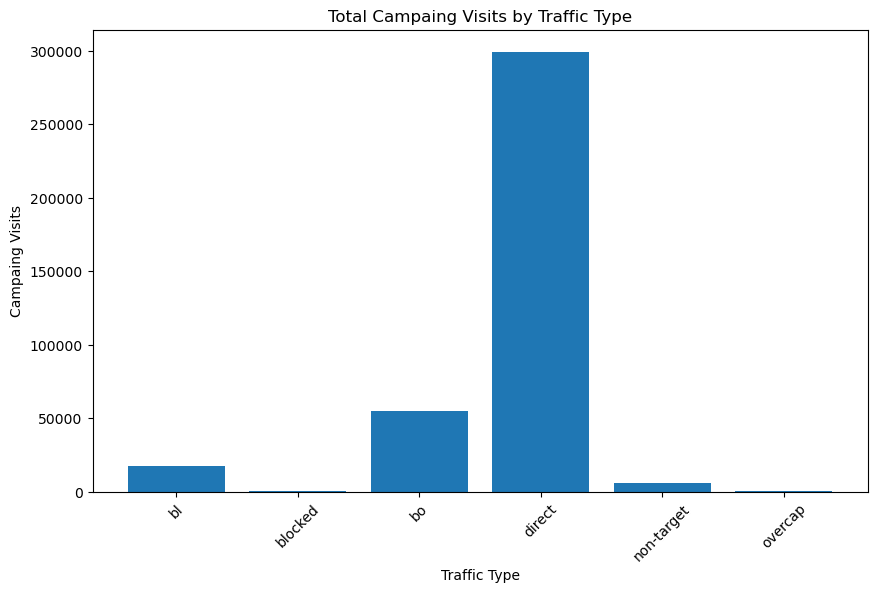

In [28]:
# Выберите метрику для визуализации (например, 'Campaing Visits')
metric_to_visualize = 'Campaing Visits'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_traffic['Traffic Type'], grouped_data_traffic[metric_to_visualize])
plt.xlabel('Traffic Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Traffic Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

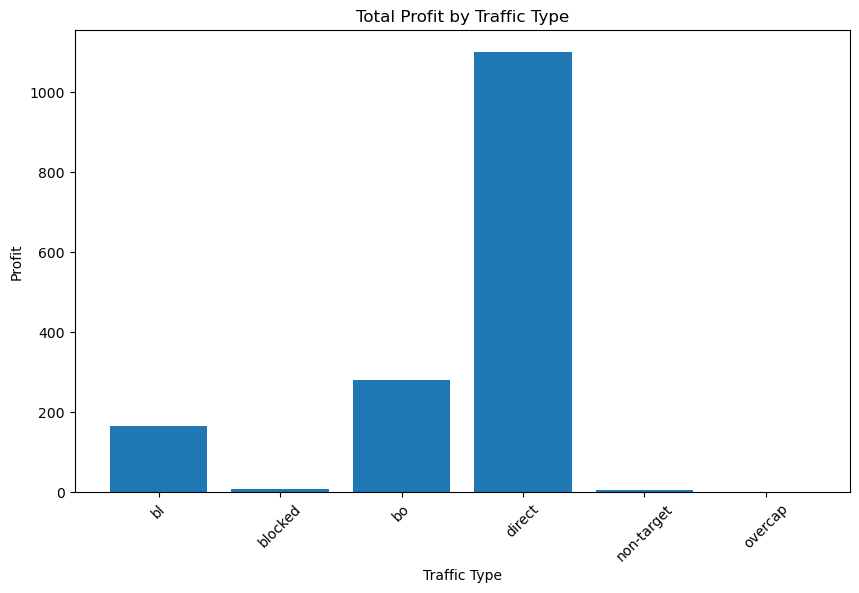

In [29]:
# Выберите метрику для визуализации (например, 'Campaing Visits')
metric_to_visualize = 'Profit'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_traffic['Traffic Type'], grouped_data_traffic[metric_to_visualize])
plt.xlabel('Traffic Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Traffic Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

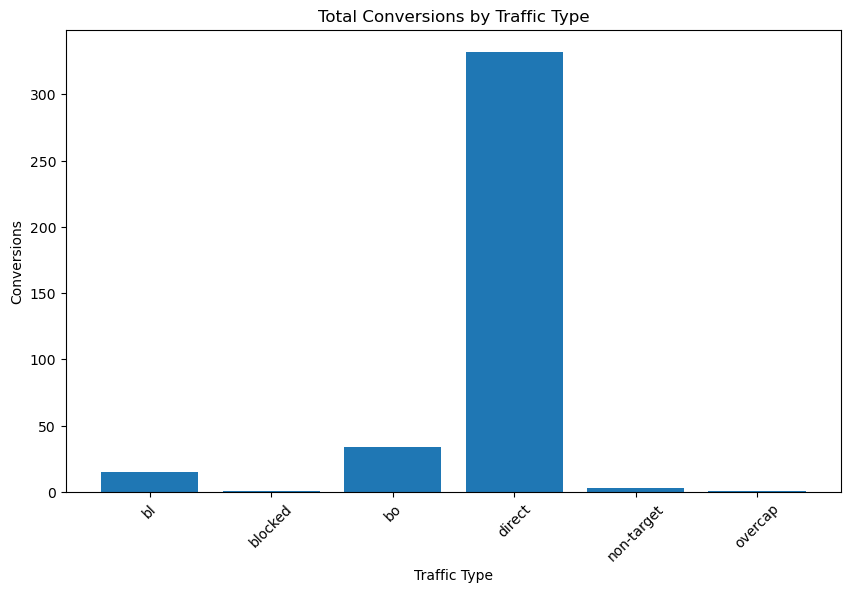

In [66]:
metric_to_visualize = 'Conversions'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_traffic['Traffic Type'], grouped_data_traffic[metric_to_visualize])
plt.xlabel('Traffic Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Traffic Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

In [67]:
grouped_data_devtype = df.groupby('Device Type').agg({
    'Campaing Visits': 'sum',
    'PreLandVisits': 'sum',
    'OfferClicks': 'sum',
    'Conversions': 'sum',
    'Payout ': 'sum',
    'Revenue ': 'sum',
    'Profit': 'sum'
}).reset_index()
grouped_data

,Device Type,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
0,Bot,35,7,20,0,0.000,0.000,0.000
1,Desktop,44789,12783,29685,309,546.383,732.737,186.293
2,Mobile,315350,72825,256443,3215,2940.659,4172.143,1230.594
3,Tablet,17983,5185,13221,142,306.046,440.410,134.338
4,custom-unknown,477,138,346,6,13.952,17.440,3.488


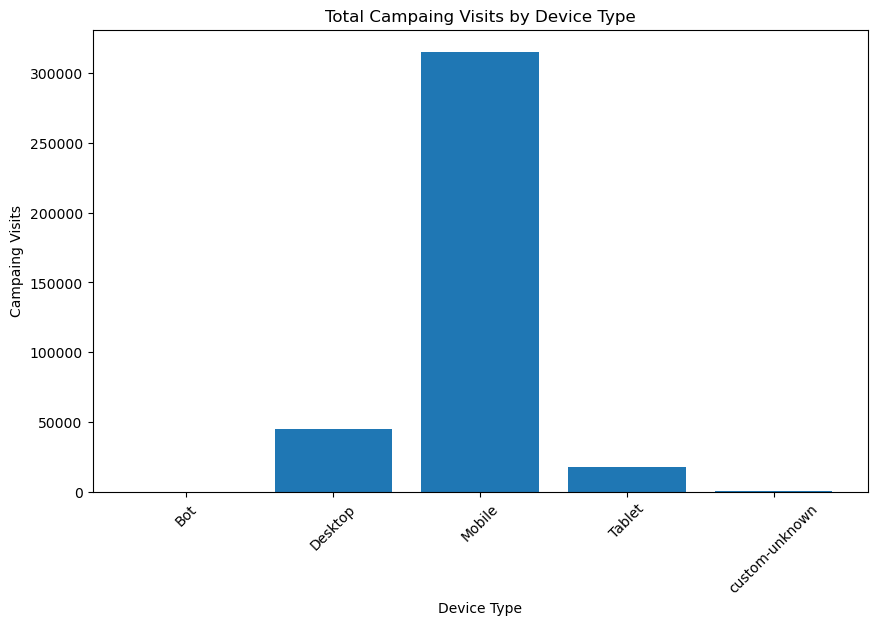

In [68]:
metric_to_visualize = 'Campaing Visits'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_devtype['Device Type'], grouped_data_devtype[metric_to_visualize])
plt.xlabel('Device Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

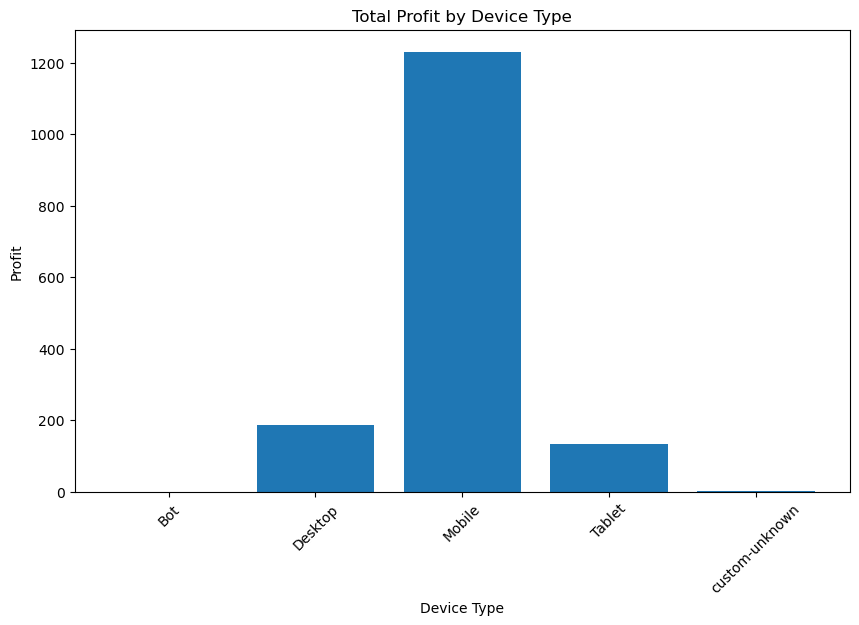

In [69]:
metric_to_visualize = 'Profit'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_devtype['Device Type'], grouped_data_devtype[metric_to_visualize])
plt.xlabel('Device Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

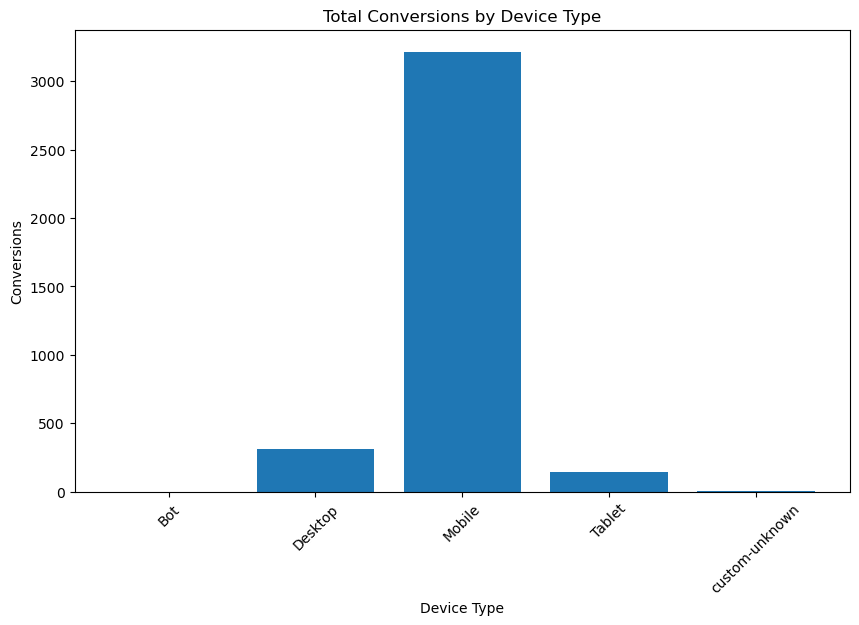

In [70]:
metric_to_visualize = 'Conversions'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_devtype['Device Type'], grouped_data_devtype[metric_to_visualize])
plt.xlabel('Device Type')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device Type')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

In [71]:
grouped_data_os = df.groupby('Device OS').agg({
    'Campaing Visits': 'sum',
    'PreLandVisits': 'sum',
    'OfferClicks': 'sum',
    'Conversions': 'sum',
    'Payout ': 'sum',
    'Revenue ': 'sum',
    'Profit': 'sum'
}).reset_index()
grouped_data

,Device OS,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
0,Android,249085,57710,206355,2751,2256.707,3245.028,987.531
1,Linux,8200,1730,6192,54,58.987,91.671,32.676
2,MacOS,7416,2122,5247,45,96.997,137.530,40.527
3,Windows,31698,9109,20500,227,398.513,524.120,125.559
4,custom-unknown,5777,1526,3641,21,53.264,66.923,13.655
5,iOS,76458,18741,57780,574,942.572,1297.458,354.765


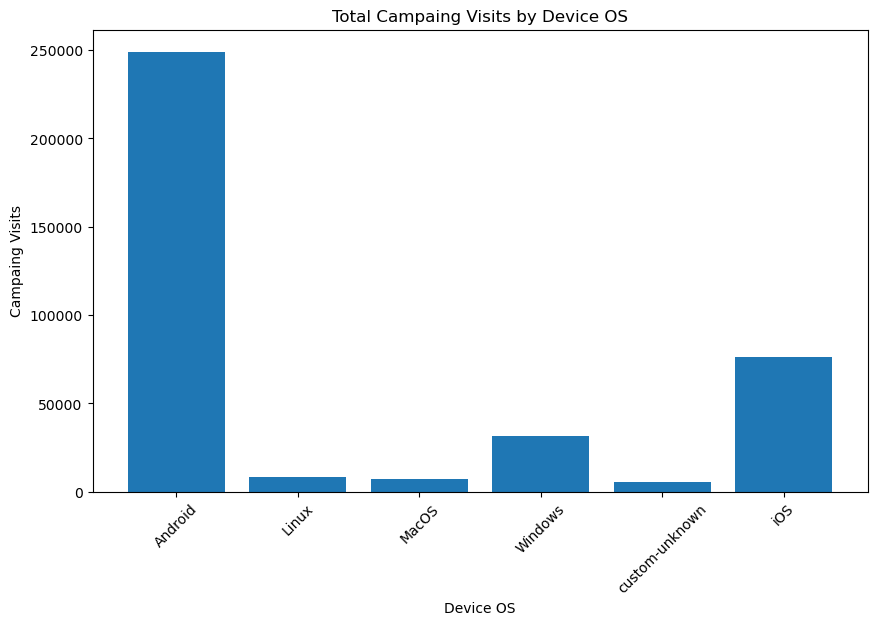

In [72]:
metric_to_visualize = 'Campaing Visits'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_os['Device OS'], grouped_data_os[metric_to_visualize])
plt.xlabel('Device OS')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device OS')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

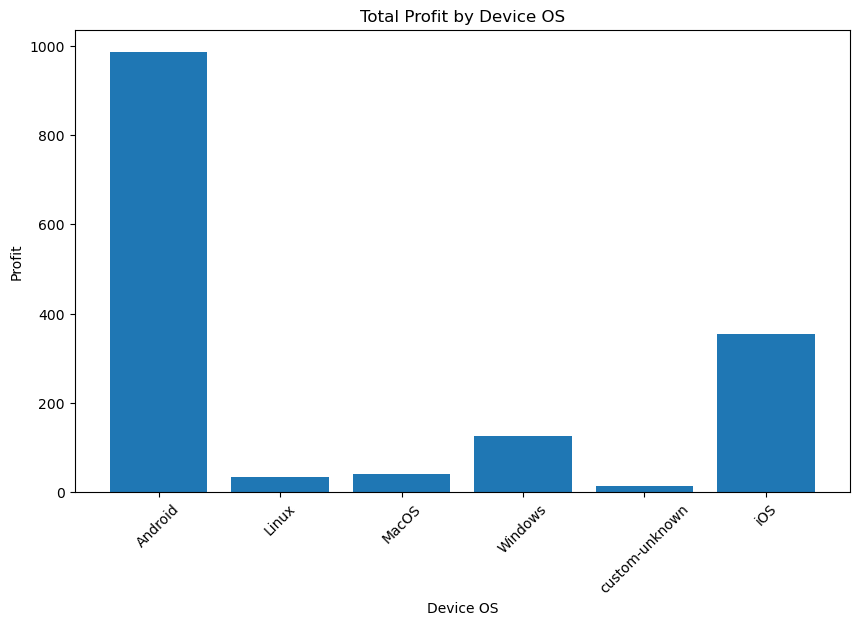

In [73]:
metric_to_visualize = 'Profit'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_os['Device OS'], grouped_data_os[metric_to_visualize])
plt.xlabel('Device OS')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device OS')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

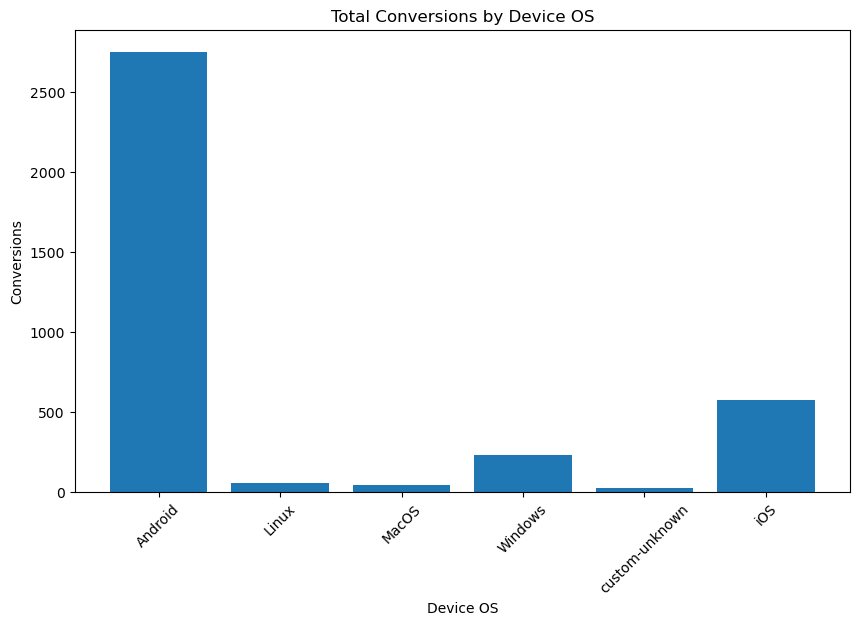

In [74]:
metric_to_visualize = 'Conversions'

# Создайте столбчатую диаграмму для выбранной метрики
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_os['Device OS'], grouped_data_os[metric_to_visualize])
plt.xlabel('Device OS')
plt.ylabel(metric_to_visualize)
plt.title(f'Total {metric_to_visualize} by Device OS')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости
plt.show()

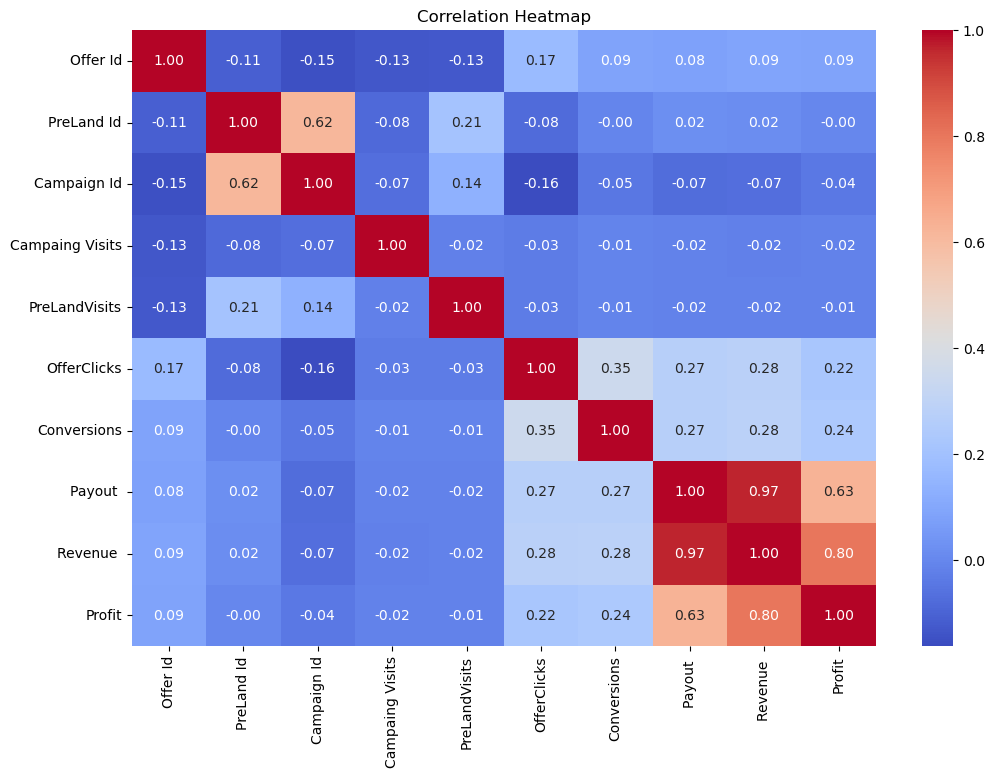

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
campaign_data = df[df['Campaign Id'] == 26]

ios_data = campaign_data[campaign_data['Device OS'] == 'iOS']
android_data = campaign_data[campaign_data['Device OS'] == 'Android']
windows_data = campaign_data[campaign_data['Device OS'] == 'Windows']
macos_data = campaign_data[campaign_data['Device OS'] == 'MacOS']
linux_data = campaign_data[campaign_data['Device OS'] == 'Linux']

In [30]:
ios_profit = ios_data['Profit'].sum()
android_profit = android_data['Profit'].sum()
windows_profit = windows_data['Profit'].sum()
macos_profit = macos_data['Profit'].sum()
linux_profit = linux_data['Profit'].sum()

# Виведіть результати
print(f'iOS Profit: {ios_profit}')
print(f'Android Profit: {android_profit}')
print(f'Windows Profit: {windows_profit}')
print(f'MacOS Profit: {macos_profit}')
print(f'Linux Profit: {linux_profit}')

iOS Profit: 1.813
Android Profit: 40.201
Windows Profit: 1.294
MacOS Profit: 0.0
Linux Profit: 0.264


In [34]:
ios_revenue = ios_data['Revenue '].sum()
android_revenue = android_data['Revenue '].sum()
windows_revenue = windows_data['Revenue '].sum()
macos_revenue = macos_data['Revenue '].sum()
linux_revenue = linux_data['Revenue '].sum()

# Виведіть результати
print(f'iOS Revenue: {ios_revenue}')
print(f'Android Revenue: {android_revenue}')
print(f'Windows Revenue: {windows_revenue}')
print(f'MacOS Revenue: {macos_revenue}')
print(f'Linux Revenue: {linux_revenue}')

iOS Revenue: 120.19
Android Revenue: 330.752
Windows Revenue: 74.232
MacOS Revenue: 14.371
Linux Revenue: 3.009


In [303]:
campaign_data = df[df['Campaign Id'] == 34]
os_counts = campaign_data['Device OS'].value_counts()
print(os_counts)

Android           195
iOS               105
Windows            50
Linux              12
MacOS               9
custom-unknown      8
Name: Device OS, dtype: int64


In [226]:
ios_campaign = campaign_data[campaign_data['Device OS'] == 'iOS']

<AxesSubplot:xlabel='OfferClicks', ylabel='Count'>

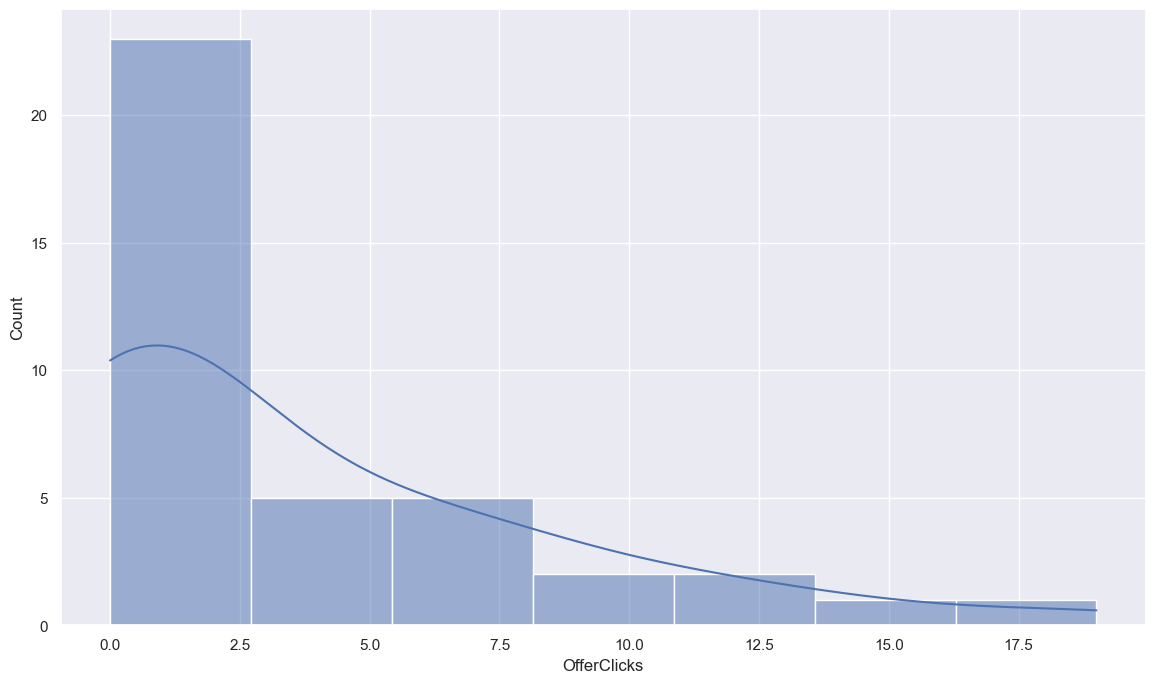

In [229]:
ios_campaign['OfferClicks']

In [222]:
campaign_data.describe(include='all')

C:\Users\Ann\AppData\Local\Temp\ipykernel_18920\2775979841.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  campaign_data.describe(include='all')


,Time,Traffic Type,Country,Device Type,Device OS,Offer Id,PreLand Id,Campaign Id,Campaing Visits,PreLandVisits,OfferClicks,Conversions,Payout,Revenue,Profit
count,84,84,84,84,84,84.000000,84.0,84.0,84.000000,84.0,84.000000,84.000000,84.0,84.000000,84.000000
unique,8,1,5,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-08-11 00:00:00,blocked,US,Mobile,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,84,47,78,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2023-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,23.833333,0.0,9.0,3.559524,0.0,3.511905,0.035714,0.0,0.082048,0.082048
std,NaN,NaN,NaN,NaN,NaN,21.435717,0.0,0.0,9.318140,0.0,6.270017,0.186691,0.0,0.444790,0.444790
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


<AxesSubplot:xlabel='Device OS', ylabel='count'>

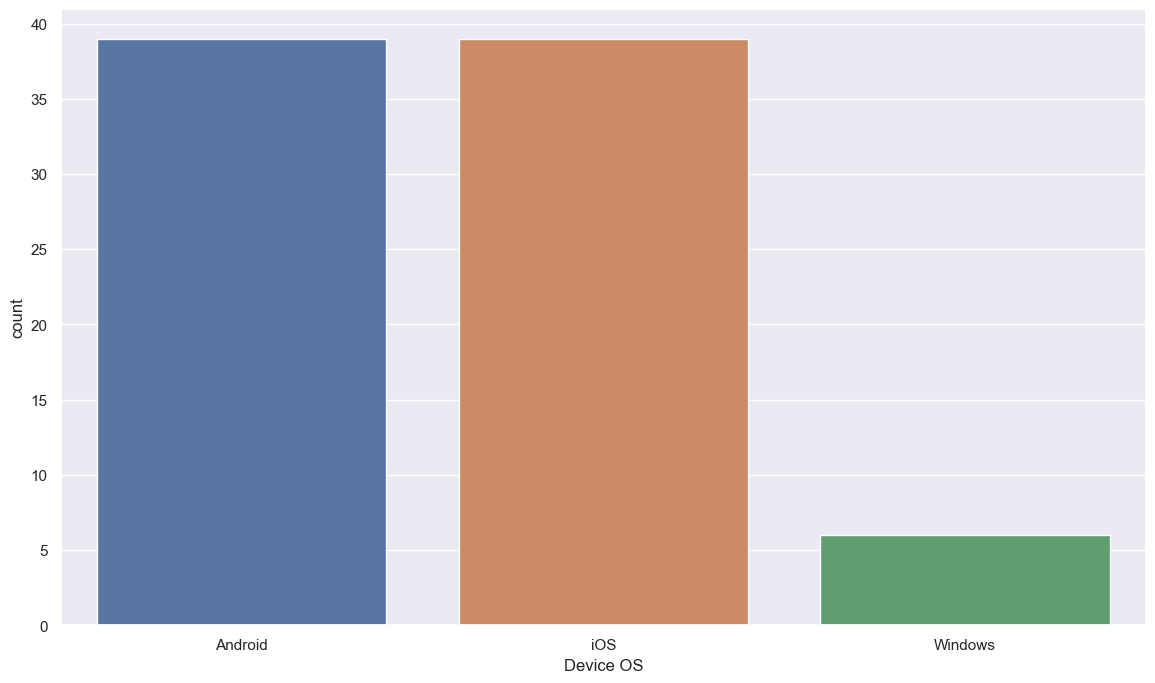

In [223]:
sns.countplot(data=campaign_data, x='Device OS')